In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix,
                             classification_report, roc_auc_score)
from statsmodels.datasets import get_rdataset

# Load dataset
smarket = get_rdataset('Smarket', 'ISLR').data
print(f"Data shape: {smarket.shape}")
smarket.head()

Data shape: (1250, 9)


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


### Dataset can be downloaded by statsmodel as well as there is a csv for it

In [4]:
smarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1250 non-null   int64  
 1   Lag1       1250 non-null   float64
 2   Lag2       1250 non-null   float64
 3   Lag3       1250 non-null   float64
 4   Lag4       1250 non-null   float64
 5   Lag5       1250 non-null   float64
 6   Volume     1250 non-null   float64
 7   Today      1250 non-null   float64
 8   Direction  1250 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 88.0+ KB


In [5]:
smarket.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [8]:
smarket.head()


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [7]:
smarket.tail()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down
1249,2005,-0.298,0.130,-0.955,0.043,0.422,1.38254,-0.489,Down


In [10]:
# Check for missing values
print("Missing values:\n", smarket.isnull().sum())

# Check duplicates
print("\nDuplicates:", smarket.duplicated().sum())


Missing values:
 Year         0
Lag1         0
Lag2         0
Lag3         0
Lag4         0
Lag5         0
Volume       0
Today        0
Direction    0
dtype: int64

Duplicates: 0


### There is no corrupt or missing data so we can proceed without explicit cleaning.

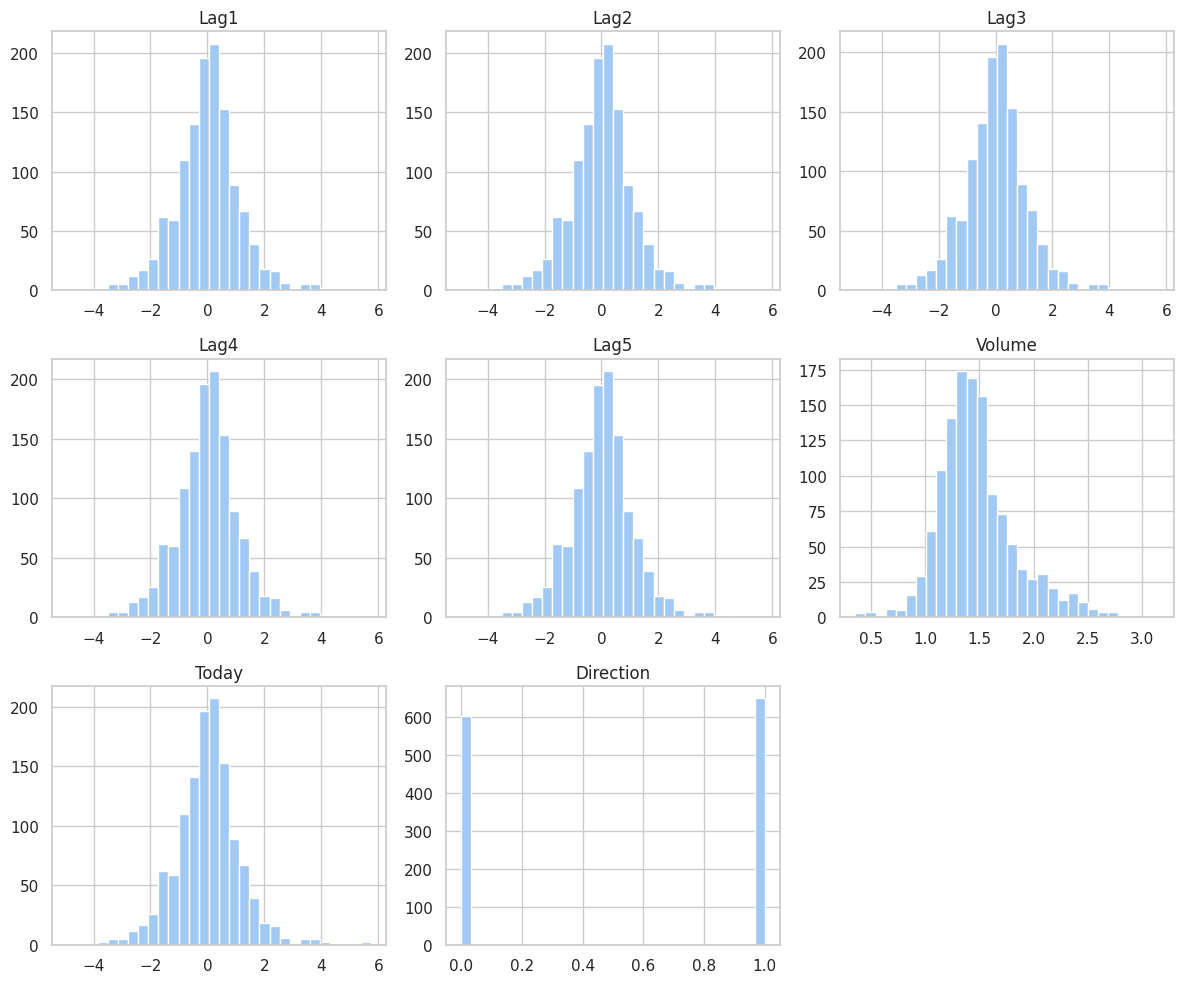

In [12]:
# Set plotting style
sns.set(style="whitegrid", palette="pastel")

# 1. Histograms of all features
df.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()



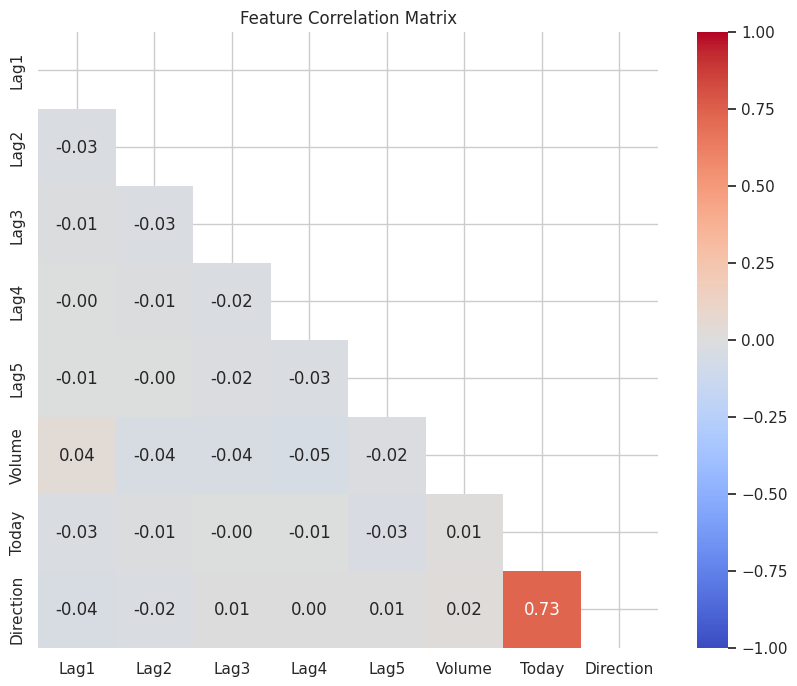

In [13]:
# 2. Correlation matrix heatmap
plt.figure(figsize=(10, 8))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Feature Correlation Matrix")
plt.show()


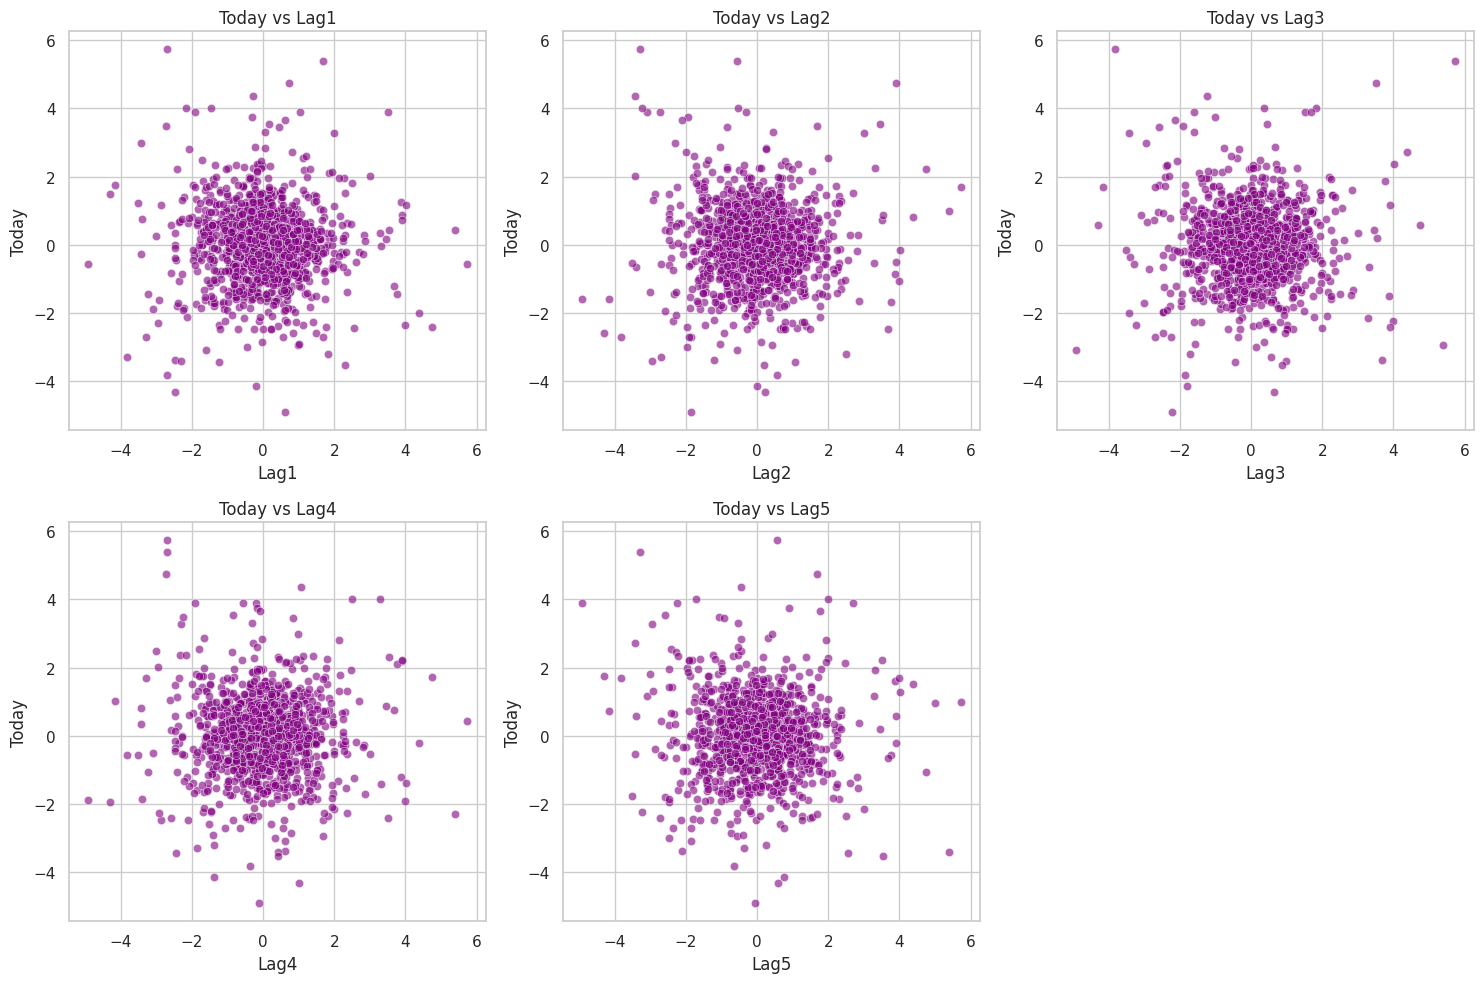

In [17]:

# 3. Scatterplots of Today vs. Lags
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, ax in enumerate(axes.flatten()[:5]):
    sns.scatterplot(data=df, x=f'Lag{i+1}', y='Today', ax=ax, alpha=0.6, color='purple')
    ax.set_title(f'Today vs Lag{i+1}')
fig.delaxes(axes[1,2])
plt.tight_layout()
plt.show()


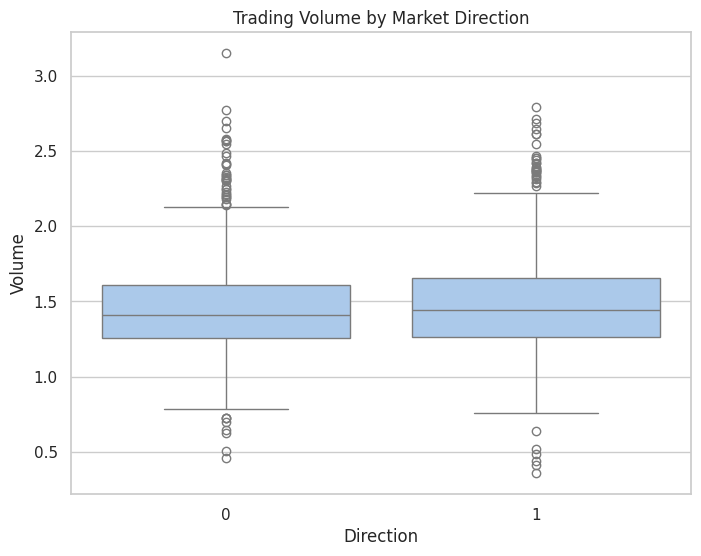

In [22]:
# 4. Volume distribution by market direction
plt.figure(figsize=(8, 6))
sns.boxplot(x='Direction', y='Volume', data=df)
plt.title("Trading Volume by Market Direction")
plt.show()

In [18]:
# Feature engineering: Create volatility proxy
df['Volatility'] = df[['Lag1','Lag2','Lag3']].std(axis=1)

# Create feature matrix and target
X = df.drop(['Today', 'Direction'], axis=1)
y = df['Direction']

# Time-based split (2001-2004 train, 2005 test)
X_train = X[X.index < 1000]  # First 1000 days = 2001-2004
y_train = y[y.index < 1000]
X_test = X[X.index >= 1000]  # Last 250 days = 2005
y_test = y[y.index >= 1000]

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training shape:", X_train_scaled.shape)
print("Test shape:", X_test_scaled.shape)

Training shape: (1000, 7)
Test shape: (250, 7)


In [19]:
# Initialize KNN classifier
knn = KNeighborsClassifier()

# Hyperparameter grid for GridSearch
param_grid = {
    'n_neighbors': range(3, 31, 2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# GridSearch with 5-fold CV
grid_search = GridSearchCV(knn, param_grid, cv=5,
                           scoring='accuracy', verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best CV accuracy:", grid_search.best_score_)

# Train best model
best_knn = grid_search.best_estimator_
best_knn.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits
Best parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best CV accuracy: 0.51


KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [1]:
# Predictions
y_pred = best_knn.predict(X_test_scaled)
y_proba = best_knn.predict_proba(X_test_scaled)[:,1]  # Probabilities for AUC

# Evaluation metrics
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature importance plot (for comparison)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
coefs = pd.Series(log_reg.coef_[0], index=X.columns)
plt.figure(figsize=(10, 6))
coefs.sort_values().plot(kind='barh', color='blue')
plt.title("Logistic Regression Feature Importance (for reference)")
plt.show()

NameError: name 'best_knn' is not defined

Misclassified examples (121/250):


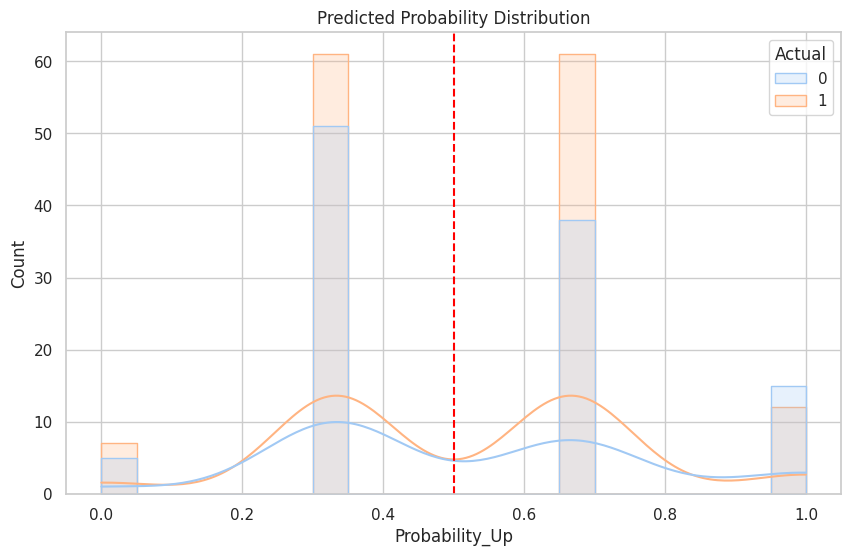

In [21]:
# Error analysis: Compare predictions vs actual
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Probability_Up': y_proba
}, index=y_test.index)

# Add key features for interpretation
feature_cols = ['Lag1', 'Lag2', 'Volume', 'Volatility']
results = pd.concat([results, X_test[feature_cols]], axis=1)

# Show misclassified examples
misclassified = results[results['Actual'] != results['Predicted']]
print(f"Misclassified examples ({len(misclassified)}/{len(y_test)}):")
misclassified.head(10)

# Plot probability calibration
plt.figure(figsize=(10, 6))
sns.histplot(data=results, x='Probability_Up', hue='Actual',
             bins=20, kde=True, element='step')
plt.title("Predicted Probability Distribution")
plt.axvline(0.5, color='red', linestyle='--')
plt.show()